In [1]:
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import *
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
import tensorflow as tf
import cv2
import os
from glob import glob
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
glob("/kaggle/input/animal_computer_vision/Dataset/*")

['/kaggle/input/animal_computer_vision/Dataset/Buffalo',
 '/kaggle/input/animal_computer_vision/Dataset/Elephant',
 '/kaggle/input/animal_computer_vision/Dataset/Zebra',
 '/kaggle/input/animal_computer_vision/Dataset/Rhino']

In [3]:
for path in glob("/kaggle/input/animal_computer_vision/Dataset/*"):
    print(len(os.listdir(path)))

1000
1000
1000
1000


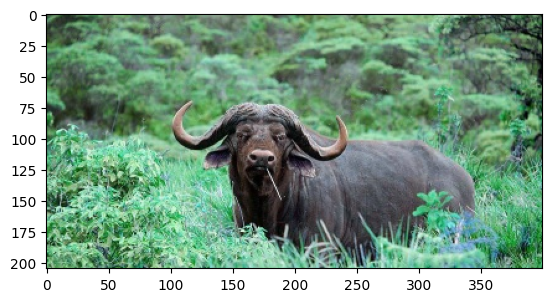

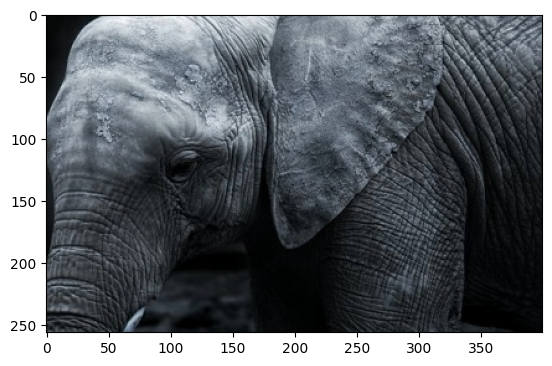

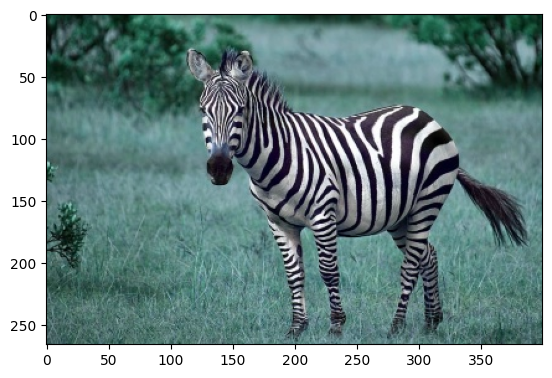

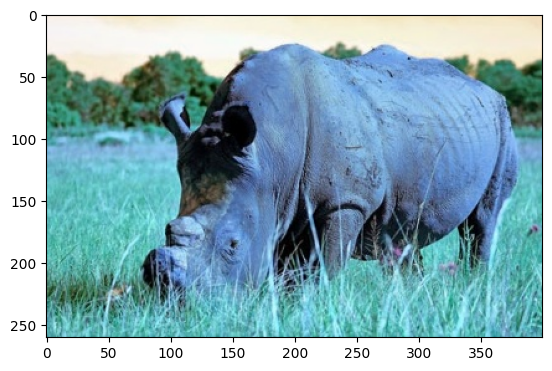

In [4]:
plt.figure()
image = cv2.imread('/kaggle/input/animal_computer_vision/Dataset/Buffalo/Buffalo_1.jpg')
plt.imshow(image)
plt.figure()
image = cv2.imread('/kaggle/input/animal_computer_vision/Dataset/Elephant/Elephant_1.jpg')
plt.imshow(image)
plt.figure()
image = cv2.imread('/kaggle/input/animal_computer_vision/Dataset/Zebra/Zebra_1.jpg')
plt.imshow(image)
plt.figure()
image = cv2.imread('/kaggle/input/animal_computer_vision/Dataset/Rhino/Rhino_1.jpg')
plt.imshow(image)

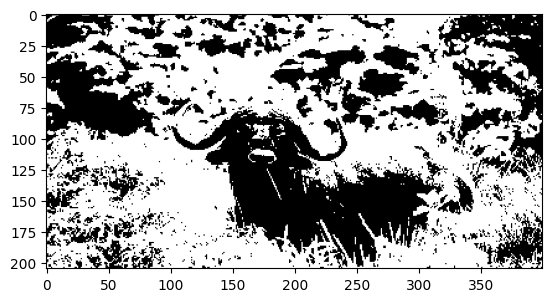

In [5]:
image = cv2.imread('/kaggle/input/animal_computer_vision/Dataset/Buffalo/Buffalo_1.jpg',0)

ret, otsu_threshold_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) #threshold(src, thresh, maxval, type)

plt.imshow(otsu_threshold_image, cmap='gray')

# Segmented Data


In [7]:
input_dir = "/kaggle/input/animal_computer_vision/Dataset/"
train_output_dir = "./train/animals_segmented/"
test_output_dir = "./test/animals_segmented/"

class_names = os.listdir(input_dir)

split = 0.8

In [8]:
for name in class_names:
    class_input_dir = os.path.join(input_dir, name)
    class_train_output_dir = os.path.join(train_output_dir, name)
    class_test_output_dir = os.path.join(test_output_dir, name)

    if not os.path.exists(class_train_output_dir):
        os.makedirs(class_train_output_dir)

    if not os.path.exists(class_test_output_dir):
        os.makedirs(class_test_output_dir)

    image_files = glob(os.path.join(class_input_dir, "*.jpg"))
    train_image_files = image_files[: int(len(image_files) * split)]
    test_image_files = image_files[int(len(image_files) * split) :]

    print("Segmenting train images of class:", name)
    for image_file in tqdm(train_image_files):
        image = cv2.imread(image_file, 0)
#         ret, thresholded_image = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)
        output_file = os.path.join(class_train_output_dir, os.path.basename(image_file))
        cv2.imwrite(output_file, image)

    print("Segmenting test images of class:", name)
    for image_file in tqdm(test_image_files):
        image = cv2.imread(image_file, 0)
#         ret, thresholded_image = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)
        output_file = os.path.join(class_test_output_dir, os.path.basename(image_file))
        cv2.imwrite(output_file, image)

Segmenting train images of class: Buffalo


100%|██████████| 800/800 [00:09<00:00, 81.77it/s]


Segmenting test images of class: Buffalo


100%|██████████| 200/200 [00:02<00:00, 76.20it/s]


Segmenting train images of class: Elephant


100%|██████████| 800/800 [00:09<00:00, 82.67it/s]


Segmenting test images of class: Elephant


100%|██████████| 200/200 [00:02<00:00, 75.96it/s]


Segmenting train images of class: Zebra


100%|██████████| 800/800 [00:09<00:00, 83.90it/s]


Segmenting test images of class: Zebra


100%|██████████| 200/200 [00:02<00:00, 75.85it/s]


Segmenting train images of class: Rhino


100%|██████████| 800/800 [00:09<00:00, 82.33it/s]


Segmenting test images of class: Rhino


100%|██████████| 200/200 [00:02<00:00, 79.73it/s]


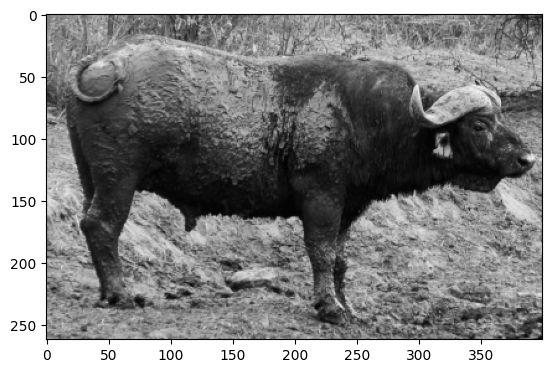

In [9]:
img1 = cv2.imread("/kaggle/working/test/animals_segmented/Buffalo/Buffalo_165.jpg")
plt.imshow(img1)

# data generator

In [10]:
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1.0/255.0,)
test_datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1.0/255.0,)

train_generator = train_datagen.flow_from_directory("./train/animals_segmented",target_size=(128, 128),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    interpolation="nearest",
                                                   color_mode= "grayscale")
test_generator = test_datagen.flow_from_directory("./test/animals_segmented",target_size=(128, 128),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    interpolation="nearest",
                                                  color_mode= "grayscale", shuffle=False)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


Epoch 1/10
100/100 [==============================] - 16s 54ms/step - loss: 1.0407 - accuracy: 0.4509 - val_loss: 0.9540 - val_accuracy: 0.5200
Epoch 2/10
100/100 [==============================] - 5s 50ms/step - loss: 0.8309 - accuracy: 0.6125 - val_loss: 0.7350 - val_accuracy: 0.6700
Epoch 3/10
100/100 [==============================] - 5s 50ms/step - loss: 0.7443 - accuracy: 0.6769 - val_loss: 0.7361 - val_accuracy: 0.6837
Epoch 4/10
100/100 [==============================] - 5s 50ms/step - loss: 0.6647 - accuracy: 0.7225 - val_loss: 0.6561 - val_accuracy: 0.7275
Epoch 5/10
100/100 [==============================] - 5s 50ms/step - loss: 0.6213 - accuracy: 0.7531 - val_loss: 0.6239 - val_accuracy: 0.7462
Epoch 6/10
100/100 [==============================] - 5s 52ms/step - loss: 0.5376 - accuracy: 0.7806 - val_loss: 0.5761 - val_accuracy: 0.7688
Epoch 7/10
100/100 [==============================] - 5s 51ms/step - loss: 0.5161 - accuracy: 0.8016 - val_loss: 0.5135 - val_accuracy: 0.792

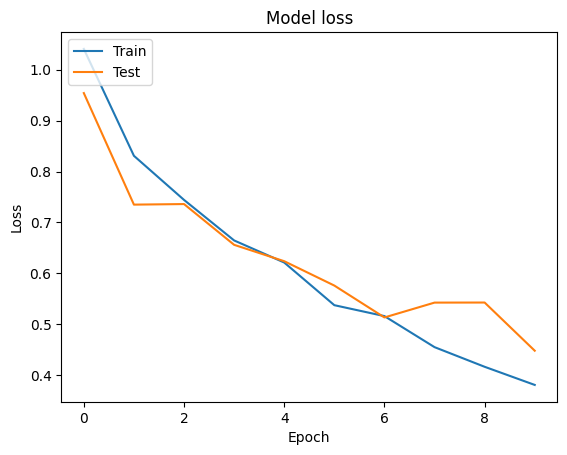

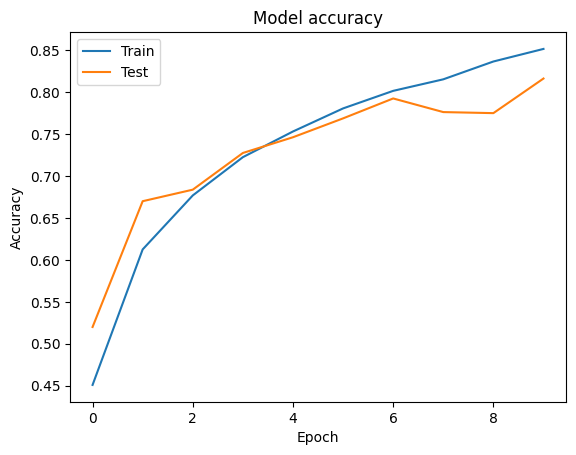

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128,1),),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu',),
    Dense(4, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, validation_data=test_generator,batch_size=32)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [30]:
files=test_generator.filenames
class_dict=test_generator.class_indices # a dictionary of the form class name: class index
rev_dict={}
for key, value in class_dict.items():
    rev_dict[value]=key   # dictionary of the form class index: class name
pred = model.predict(test_generator)
for i, p in enumerate(pred):
    index=np.argmax(p)
    klass=rev_dict[index]    
    prob=p[index]
    print('for file ', files[i], ' predicted class is ', klass,' with probability ',prob)

25/25 [==============================] - 1s 44ms/step


In [12]:
# Predict on test data
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Print confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))

25/25 [==============================] - 1s 40ms/step
Confusion Matrix
[[156  31  12   1]
 [ 18 166  14   2]
 [ 19  31 147   3]
 [  1   3   3 193]]


Classification Report
              precision    recall  f1-score   support

     Buffalo       0.80      0.78      0.79       200
    Elephant       0.72      0.83      0.77       200
       Rhino       0.84      0.73      0.78       200
       Zebra       0.97      0.96      0.97       200

    accuracy                           0.83       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.83      0.83      0.83       800



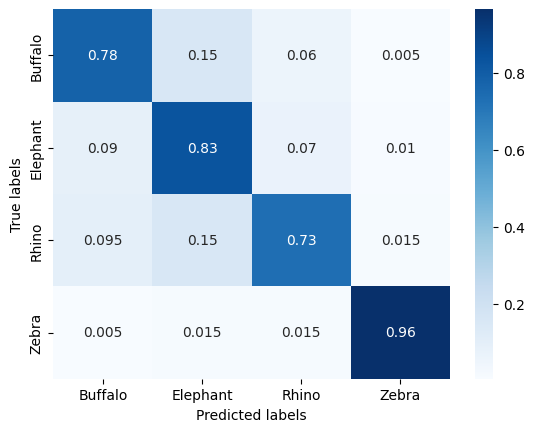

In [13]:
# Print classification report
print('Classification Report')
target_names = ['Buffalo', 'Elephant', 'Rhino', 'Zebra']
print(classification_report(y_true, y_pred, target_names=target_names))

# Visualize confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()